Submission deadline: Friday 1/3/2024 on elearn

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/ee5a8decd5ca7b22312e1a34868526ea6c76b392/Images/gmm.png?raw=true')


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


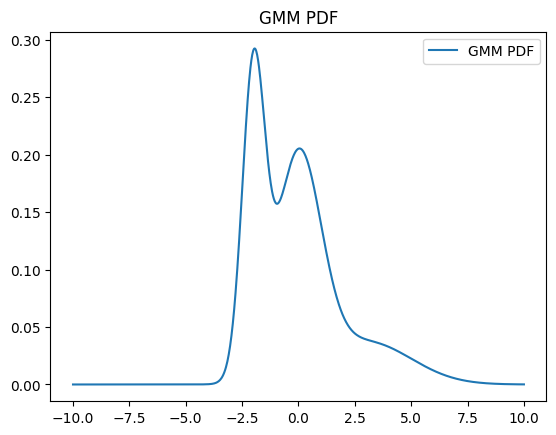

In [39]:
# Analyticall generate the GMM model pdf
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

#Parameters for the Gaussian distribution
mu = [0,-2,3] #Mean
sigma = [1,0.5,2] #Standard deviation

# Generate random weights that sum to 1
weights = [random.random() for _ in range(3)]
weights = np.array(weights) / sum(weights)

# Define GMM PDF
def gmm_pdf(x):
    return np.sum([w * norm.pdf(x, mu_i, sigma_i) for w, mu_i, sigma_i in zip(weights, mu, sigma)], axis=0)

# Plot GMM PDF
x_values = np.linspace(-10, 10, 1000)
plt.plot(x_values, gmm_pdf(x_values), label='GMM PDF')
plt.title('GMM PDF')
plt.legend()
plt.show()

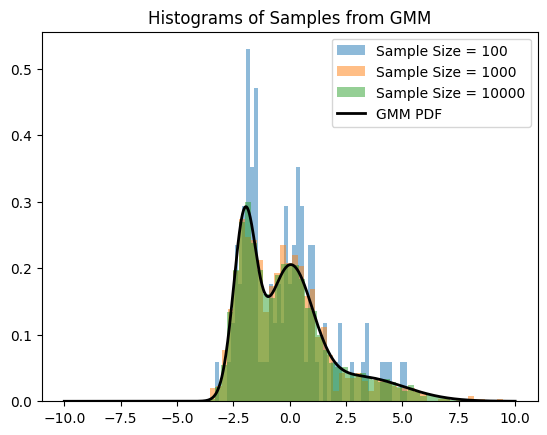

In [40]:
# Sample from the GMM and store the samples in np.vectors
def sample_from_gmm(num_samples):
    modes = np.random.choice(len(weights), size=num_samples, p=weights)
    samples = np.array([np.random.normal(mu[i], sigma[i]) for i in modes])
    return samples

# Plot histograms for different sample sizes
sample_sizes = [100, 1000, 10000]

for size in sample_sizes:
    samples = sample_from_gmm(size)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'Sample Size = {size}')

# Overlay the actual GMM PDF
plt.plot(x_values, gmm_pdf(x_values), label='GMM PDF', linewidth=2, color='black')
plt.title('Histograms of Samples from GMM')
plt.legend()
plt.show()


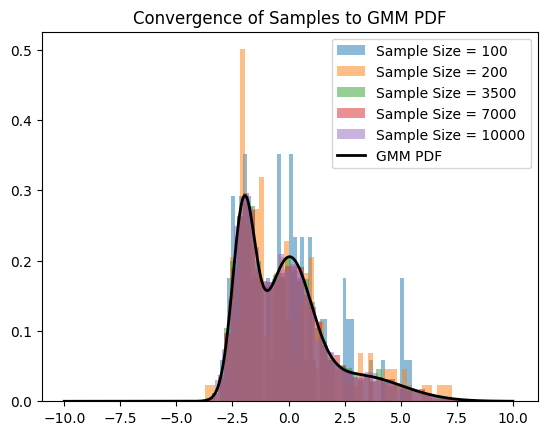

In [41]:
# Generate various plots for differnt sample sizes and show the convergence to the actual pdf

sample_sizes = [100, 200, 3500, 7000, 10000]

for size in sample_sizes:
    # Sample from GMM
    modes = np.random.choice(len(weights), size=size, p=weights)
    samples = np.array([np.random.normal(mu[i], sigma[i]) for i in modes])

    # Plot histogram
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'Sample Size = {size}')

# Overlay the actual GMM PDF
plt.plot(x_values, gmm_pdf(x_values), label='GMM PDF', linewidth=2, color='black')

# Legend and title
plt.legend()
plt.title('Convergence of Samples to GMM PDF')
plt.show()



---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [42]:

# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Get data
data = load_breast_cancer(as_frame=True).data

# Printing head and tail of data frame to get some first view
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


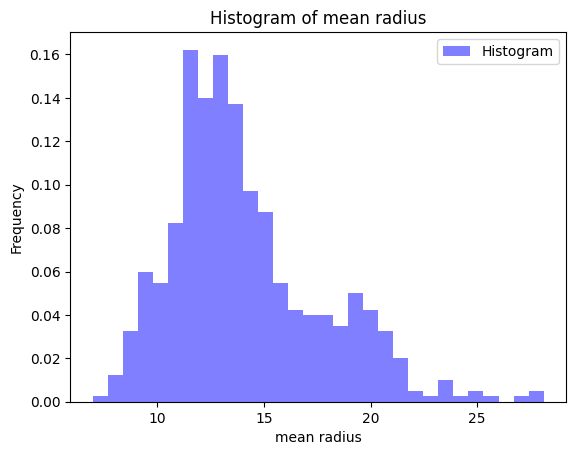

0.05-quantile: 7.18264
0.25-quantile: 7.70696
0.5-quantile: 7.75504
0.75-quantile: 8.201979999999999
0.95-quantile: 8.358392


In [43]:
# Select a feature vector, plot its histogram and p-values with vertical axes
feature = 'mean radius'
feature_vector = data[feature]

#Plot
plt.hist(feature_vector, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate p-values (quantiles)
p_values = [0.05, 0.25, 0.5, 0.75, 0.95]
quantiles = np.percentile(feature_vector, p_values * 100)

#Visualize
for p, quantile in zip(p_values, quantiles):
    print(f'{p}-quantile: {quantile}')






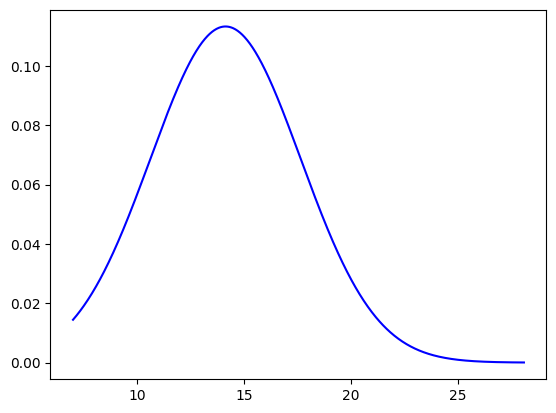

In [44]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram
mean_estimate = np.mean(feature_vector)
std_estimate = np.std(feature_vector)

x_values = np.linspace(min(feature_vector), max(feature_vector), 1000)
gaussian_estimate = norm.pdf(x_values, mean_estimate, std_estimate)
plt.plot(x_values, gaussian_estimate, color='blue',label='Gaussian Estimate')




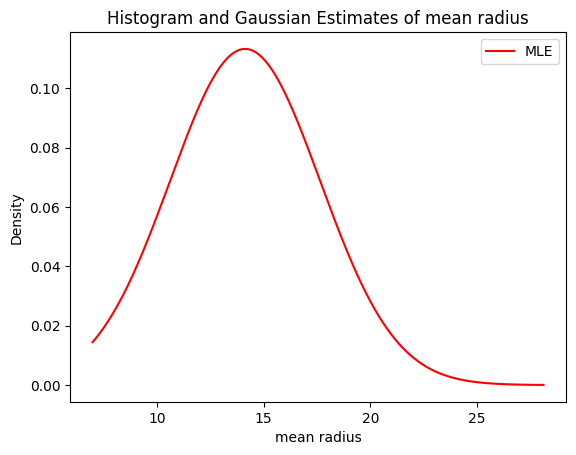

In [45]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)
mle_mean = np.mean(feature_vector)
mle_std = np.std(feature_vector, ddof=0) #ddof=0

# Plot Gaussian estimate using MLE
mle_gaussian_estimate = norm.pdf(x_values, mle_mean, mle_std)
plt.plot(x_values, mle_gaussian_estimate, color='red',label='MLE')

# Display plot details
plt.title(f'Histogram and Gaussian Estimates of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.show()



